In [1]:
import sys
sys.path.append('../')

In [40]:
import pandas as pd
import decimal
from datetime import datetime
from dateutil import parser
from plotting import CandlePlot
import plotly.graph_objects as go
from technical.patterns import is_bearish_pattern, is_bullish_pattern
from technical.peaks import get_peaks, PeakType, plot_peaks, get_peak
from collections import namedtuple
from typing import List
from simulator.simulator import Simulator
from simulator.trade import TradeOutcome
from strategies.supply_demand_strategy import SupplyDemandStrategy
import pickle
import pathlib

In [4]:
start = parser.parse('2023-01-02T00:00:00Z')
end = parser.parse('2024-01-02T22:00:00Z')

df_h1 = pd.read_pickle(f"../data/candles/EUR_USD_H1.pkl")
df_m5 = pd.read_pickle(f"../data/candles/EUR_USD_M5.pkl")

df_h1 = df_h1[(df_h1.time >= start) & (df_h1.time <= end)].reset_index(drop=True)
df_m5 = df_m5[(df_m5.time >= start) & (df_m5.time <= end)].reset_index(drop=True)

In [9]:
sd_strategy = SupplyDemandStrategy(risk_to_reward=1.5)
simulator = Simulator(strategy=sd_strategy, df=df_h1, df_smaller=df_m5, delta_in_mins=55)

In [ ]:
path = pathlib.Path.cwd().parent / 'simulations' / 'supply_demand' / 'eur_usd_07_Sep_2024(07:30PM).pkl'
with open(path, "rb") as f:
    trades = pickle.load(f)

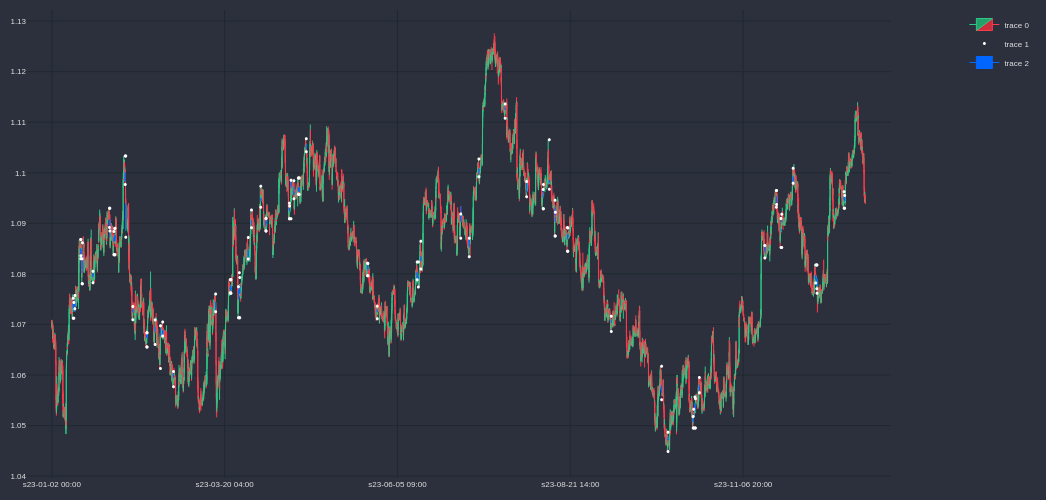

In [41]:
simulator.plot_trades([t for t in trades if t.outcome == TradeOutcome.LOSS], lambda data : fr"peaks: {[p.idx for p in data['peaks']]}")

In [38]:
print(f"""
{trades[1].entry_idx}
{trades[1].outcome}
{trades[1].signal}
""")


164
TradeOutcome.LOSS
SignalType.SELL



In [ ]:
def method(idx, trade):
    if idx != 0:
        trades[idx-1].data['peaks']
[t for idx, t in enumerate(trades) if ]